In [13]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as ss
%matplotlib inline

In [14]:
mean = 3.5
sd = 0.76

In [15]:
nd = ss.norm(mean,sd)

In [16]:
nd

In [17]:
x=2.6

In [18]:
nd.cdf(x)

0.11816486815719918

In [19]:
2*nd.cdf(x)

0.23632973631439835

In [21]:
2*nd.cdf(.5)

7.9014917775632523e-05

In [24]:
def two_tails_plot(nd,X,mean,sd):
    
    x = np.linspace(mean-4*sd, mean+4*sd, 5000)
    y_cdf = ss.norm.pdf(x,3.5, 0.76)
    plt.plot(x, y_cdf, label='cdf')
    if X < mean:
        lo = mean-4*sd
        hi = X
        lo2 = (mean-X)+mean
        hi2 = mean+4*sd
    else:
        lo = mean-4*sd
        hi = (mean-X)+mean
        lo2 = X
        hi2 = mean+4*sd
    x = np.linspace(lo, hi, 5000)
    x2 = np.linspace(lo2, hi2, 5000)
    plt.fill_between(x, nd.pdf(x), y2=0, where= x >= lo , \
                     interpolate=False, \
                     color='blue', alpha = 0.2)
    plt.fill_between(x2, nd.pdf(x2), y2=0, where= x2 >= lo2 , \
                     interpolate=False, \
                     color='blue', alpha = 0.2)

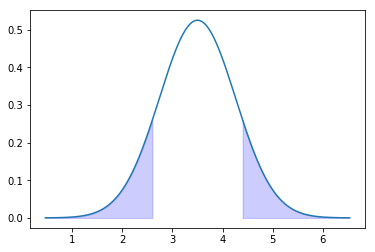

In [25]:
two_tails_plot(nd,x,mean,sd)

In [30]:
mean=1.03
sd= 0.1
x=1.
n=50

In [32]:
z= (x-mean)/(sd/np.sqrt(n))
z

-2.1213203435596446

In [33]:
ss.norm.cdf(z)

0.01694742676234454

In [49]:
X = np.array([1.316,1.308,1.321,1.311,1.310])

{'boxes': [<matplotlib.lines.Line2D at 0x26fb53bd9b0>],
 'caps': [<matplotlib.lines.Line2D at 0x26fb53c63c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x26fb53cf128>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26fb53c6c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26fb532bef0>,
  <matplotlib.lines.Line2D at 0x26fb53bdf60>]}

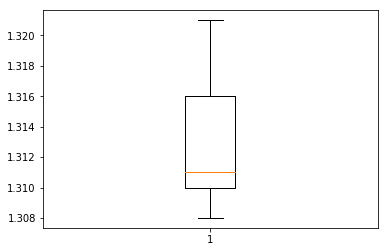

In [42]:
plt.boxplot(X)

In [43]:
mean=np.mean(X)
sd= np.std(X)
print(mean,sd)

1.3132 0.00470744091838


In [44]:
df = len(X)-1
alpha = .99

In [45]:
ss.t.interval(alpha,df,mean,ss.sem(X))

(1.3023632477051061, 1.3240367522948941)

In [46]:
X.append([1.0])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [53]:
X = np.array([1.316,1.308,1.321,1.311,1.310,1.35])

{'boxes': [<matplotlib.lines.Line2D at 0x26fb5495208>],
 'caps': [<matplotlib.lines.Line2D at 0x26fb5495d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x26fb549ea90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x26fb549e630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x26fb53f3fd0>,
  <matplotlib.lines.Line2D at 0x26fb54958d0>]}

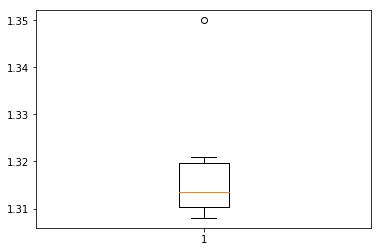

In [54]:
plt.boxplot(X)

In [56]:
n = 85
X = 51

In [62]:
def binom_CI(n,X,alpha):
    n_hat = n+4
    p_hat = (X+2) / n_hat
    
    z= ss.norm.ppf(1-alpha/2)
    
    ci = z*np.sqrt(p_hat*(1-p_hat)/n_hat)
    
    return np.array([p_hat-ci,p_hat+ci])

In [63]:
binom_CI(85,51,.1)

array([ 0.50993367,  0.68107757])